# EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import os

In [3]:
data = None
if not os.path.exists('../../data/preprocessed_recipe.csv'):
    print('Not found: ../../data/preprocessed_recipe.csv')
else:
    data = pd.read_csv('../../data/preprocessed_recipe.csv')

In [4]:
data.head()

,Unnamed: 0,id,name,minutes,n_steps,description,n_ingredients,steps_string_standardize,ingredients_text,tags_text,cuisine,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
0,0,137739,arriba baked squash mexican,55,11,autumn is my favorite time of year to cook! th...,7,make a choic and proceed with recip depend on ...,"['winter squash', 'mexican seasoning', 'mixed ...","['60-minutes-or-less', 'time-to-make', 'course...",North America – United States,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,1,31490,breakfast pizza,30,9,this recipe calls for the crust to be prebaked...,6,preheat oven to 103.33 celsius °c press dough ...,"['prepared pizza crust', 'sausage patty', 'egg...","['30-minutes-or-less', 'time-to-make', 'course...",North America – United States,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,4,44061,amish tomato ketchup canning,190,5,my dh's amish mother raised him on this recipe...,8,"mix all ingredients& boil for 2 30.0 minute , ...","['tomato juice', 'apple cider vinegar', 'sugar...","['weeknight', 'time-to-make', 'course', 'main-...",North America – United States,352.9,1.0,337.0,23.0,3.0,0.0,28.0
3,5,25274,marinated olive,15,4,my italian mil was thoroughly impressed by my ...,9,toast the fennel seed and lightli crush them p...,"['fennel seeds', 'green olives', 'ripe olives'...","['15-minutes-or-less', 'time-to-make', 'course...",North America – United States,380.7,53.0,7.0,24.0,6.0,24.0,6.0
4,6,67888,barbecued rib,120,10,this recipe is posted by request and was origi...,22,in a medium saucepan combin all the ingredi fo...,"['pork spareribs', 'soy sauce', 'fresh garlic'...","['weeknight', 'time-to-make', 'course', 'main-...",North America – United States,1109.5,83.0,378.0,275.0,96.0,86.0,36.0


# Data Analysis of the dataset

We will perform data analysis on the dataset to understand the distribution of the data and its characteristics. With this analysis, we can identify the features that are useful for our model and the ones we can drop.

### `n_steps`

We will check the correlation between the number of steps of the recipes and the the type of cuisine of the recipe. We will also check the distribution of the number of steps per type of cuisine.

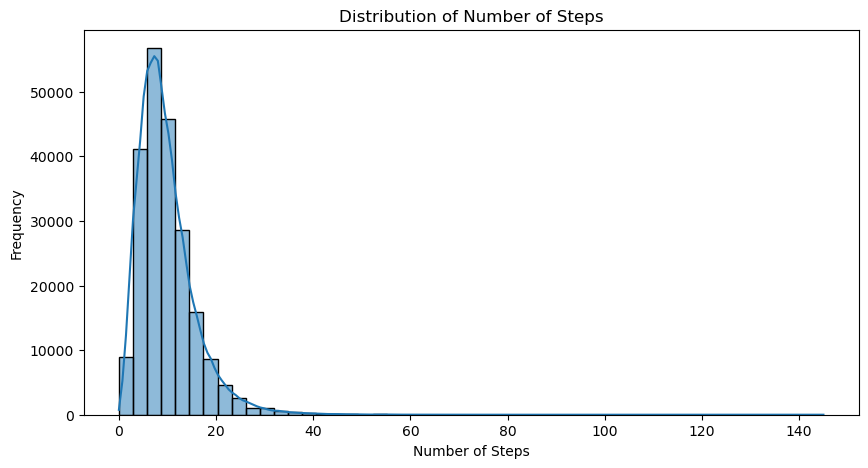

n_steps
7     19415
8     18781
6     18570
9     17164
5     16749
10    15322
4     13623
11    13315
12    11248
3     10724
Name: count, dtype: int64

In [7]:
# Distribution of n_steps
plt.figure(figsize=(10, 5))
sns.histplot(data['n_steps'], kde=True, bins=50)
plt.title('Distribution of Number of Steps')
plt.xlabel('Number of Steps')
plt.ylabel('Frequency')
plt.show()
# Sorted frequency of n_steps
sorted_freq = data['n_steps'].value_counts().sort_values(ascending=False)
sorted_freq[:10]

In [8]:
# Mean number of steps per cuisine
mean_steps = data.groupby('cuisine')['n_steps'].mean()
mean_steps = mean_steps.reset_index()
mean_steps.columns = ['cuisine', 'mean_steps']
# Plot the bar graph
plt.figure(figsize=(10, 6))
order = mean_steps.sort_values('mean_steps')['cuisine']
sns.barplot(x='cuisine', y='mean_steps', data=mean_steps, order=order)
plt.xticks(rotation=90)
plt.title('Mean number of steps per cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Mean number of steps')
plt.show()


KeyError: 'cuisine'

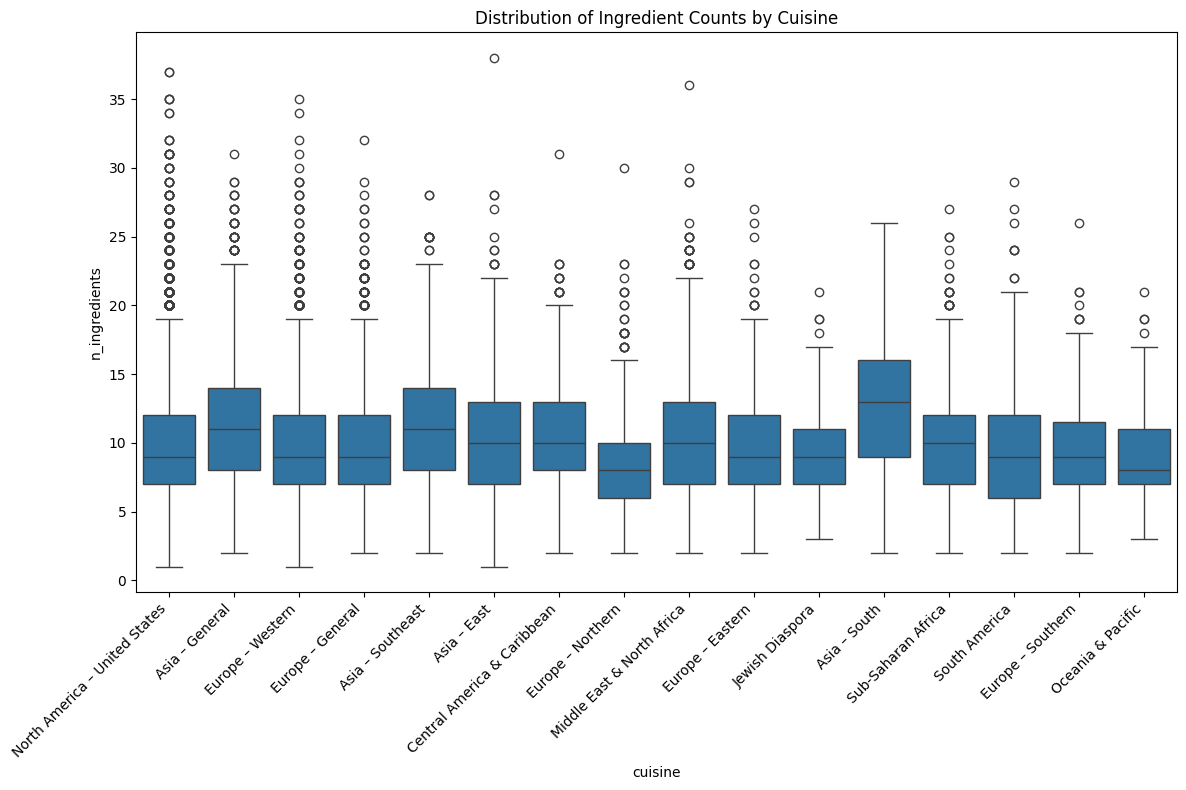

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='cuisine', y='n_ingredients', data=data)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Ingredient Counts by Cuisine')
plt.tight_layout()
plt.show()

### Conclusion

We can see that the majority of the recipes have between 6 and 10 steps. The calculated mean of number of steps is also evenly distributed across different types of cuisines but some informations can be extracted from it. We can see that the Estern European cuisine has the highest mean number of steps (12) and the Oceanic & Pacific cuisine has the lowest mean number of steps (8.5). This can be explained by the fact that Eastern European cuisine may more complex to prepare.

We can keep the number of steps as a feature in our model.

### `n_ingredients`
We will check the correlation between the number of ingredients of the recipes and the the type of cuisine of the recipe. We will also check the distribution of the number of ingredients per type of cuisine.

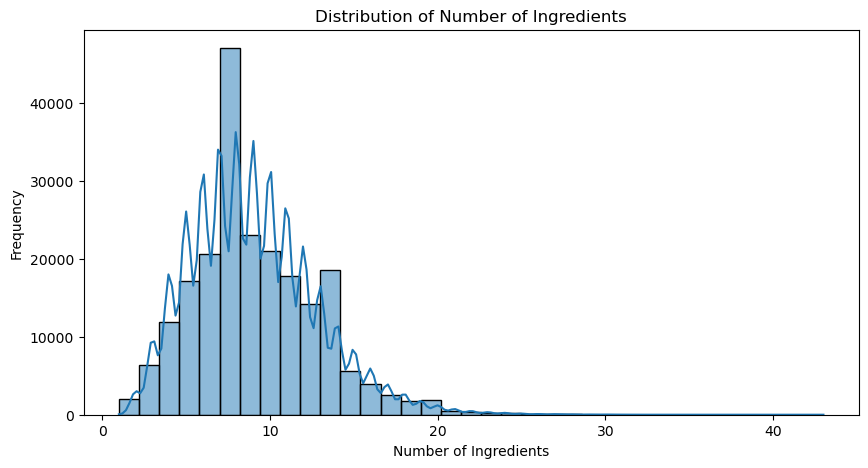

n_ingredients
8     23904
7     23115
9     23076
10    20947
6     20550
11    17799
5     17106
12    14171
4     11943
13    10858
Name: count, dtype: int64

In [9]:
# Distribution of n_ingredients
plt.figure(figsize=(10, 5))
sns.histplot(data['n_ingredients'], kde=True, bins=35)
plt.title('Distribution of Number of Ingredients')
plt.xlabel('Number of Ingredients')
plt.ylabel('Frequency')
plt.show()
# Sorted frequency of n_steps
sorted_freq = data['n_ingredients'].value_counts().sort_values(ascending=False)
sorted_freq[:10]

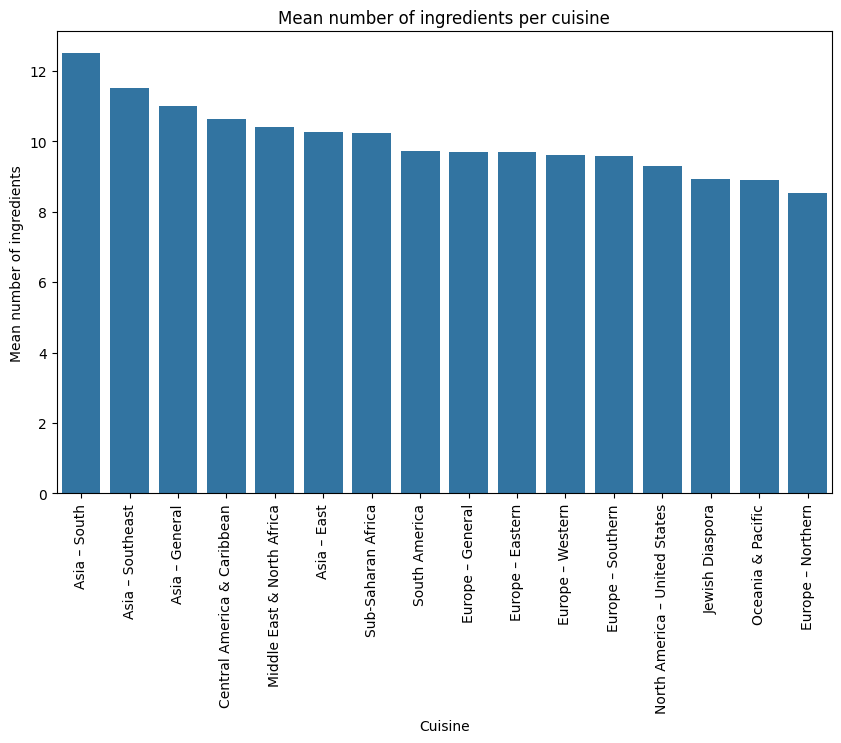

In [ ]:
# Mean number of steps per cuisine
mean_ingredients = data.groupby('cuisine')['n_ingredients'].mean()
mean_ingredients = mean_ingredients.reset_index()
mean_ingredients.columns = ['cuisine', 'mean_ingredients']
mean_ingredients.sort_values('mean_ingredients', ascending=False, inplace=True)

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='cuisine', y='mean_ingredients', data=mean_ingredients)
plt.xticks(rotation=90)
plt.title('Mean number of ingredients per cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Mean number of ingredients')
plt.show()

In [12]:
data.cuisine

AttributeError: 'DataFrame' object has no attribute 'cuisine'

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='cuisine', y='n_ingredients', data=data)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Ingredient Counts by Cuisine')
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `cuisine` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x800 with 0 Axes>

### Conclusion

The number of ingredients is also evenly distributed across different types of cuisines but some informations can be extracted from it. We can see that the Southern Asian cuisine has the highest mean number of ingredients (13) and the Northern European cuisine has the lowest mean number of ingredients (9). This can be explained by the fact that Southern Asian cuisine may require more spices in their recipes.

We can keep the number of ingredients as a feature in our model as it is a good indicator of the origin of the recipe.

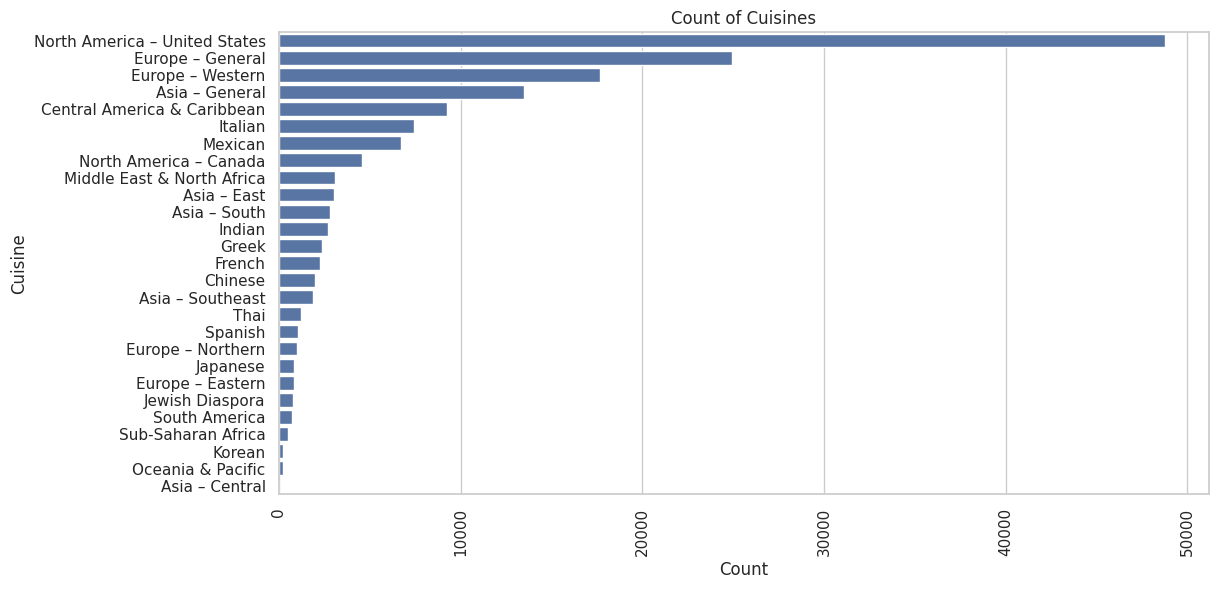

In [ ]:
# Explode the 'cuisine' column to count each label separately
exploded = data['cuisines'].explode()
cuisine_counts = exploded.value_counts().sort_values(ascending=False).reset_index()
cuisine_counts.columns = ['cuisine', 'count']

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
plt.title('Count of Cuisines')
plt.xticks(rotation=90)

# Plotting the bar chart
sns.barplot(x='count', y='cuisine', data=cuisine_counts)
plt.xlabel('Count')
plt.ylabel('Cuisine')
plt.show()

The data is unbalanced as we have more recipes from the US than from other countries. We can see that the US cuisine has the highest number of recipes (~47000) and the most half of the other labels are below 1000. We may need to balance the data before training our model. We can use the `SMOTE` algorithm to balance the data.

## Correlation between n_steps and cooking time

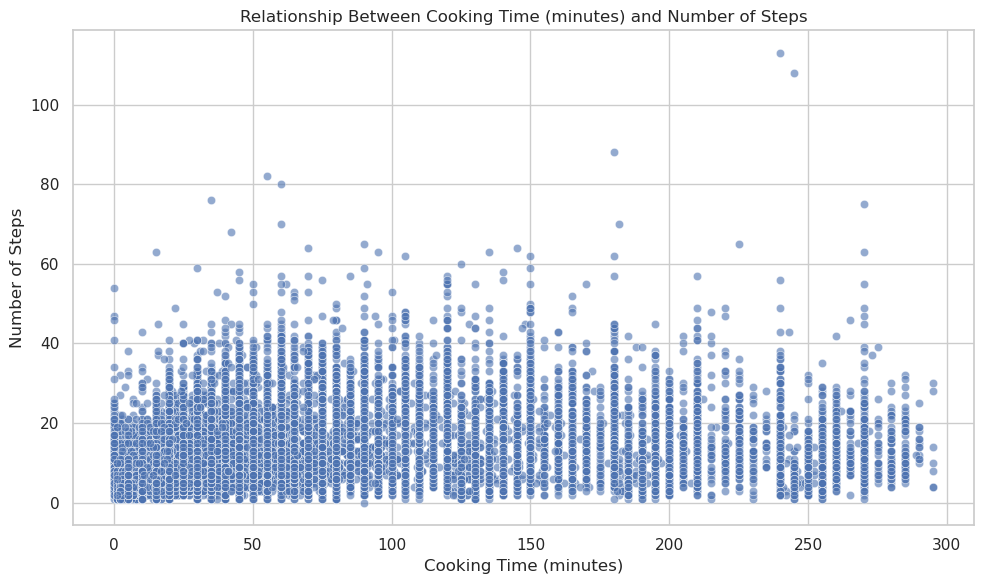

In [7]:
# Optionally filter out extreme values for better visualization

# Create the scatter plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='minutes', y='n_steps', alpha=0.6)
plt.title('Relationship Between Cooking Time (minutes) and Number of Steps')
plt.xlabel('Cooking Time (minutes)')
plt.ylabel('Number of Steps')
plt.tight_layout()
plt.show()